# Домашнее задание

## Задание 1
Реализуйте XOR с помощью 3 нейронов. Запишите ответ в виде выражения, состоящего из объектов neuron() – моделей нейрона с пороговой функцией активации, внутри скобок может быть что угодно. Входы верхнего уровня называются x1 и x2. Пример фрагмента записи: neuron(1x1 + 5x2 - 0.1) + neuron(x1)

 **neuron(neuron(x2-x1)+neuron(x1-x2))**


In [5]:
import torch

In [6]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(2, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.]))

In [7]:
neuron1 = Neuron()
neuron1.fc.weight.data = torch.tensor([[1., -1.]])
neuron1.fc.bias.data = torch.tensor([0.])

In [8]:
neuron2 = Neuron()
neuron2.fc.weight.data = torch.tensor([[-1., 1.]])
neuron2.fc.bias.data = torch.tensor([0.])

In [9]:
neuron3 = Neuron()
neuron3.fc.weight.data = torch.tensor([[1., 1.]])
neuron3.fc.bias.data = torch.tensor([0.])

In [10]:
x = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.],])

neuron3(torch.cat((neuron1(x), neuron2(x)), 1))

tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<NotImplemented>)

## Задание 2
Нарисуйте backward граф для выражения a*b+c*d. Сравните полученные теоретические значения с аттрибутами grad у исходных тензоров.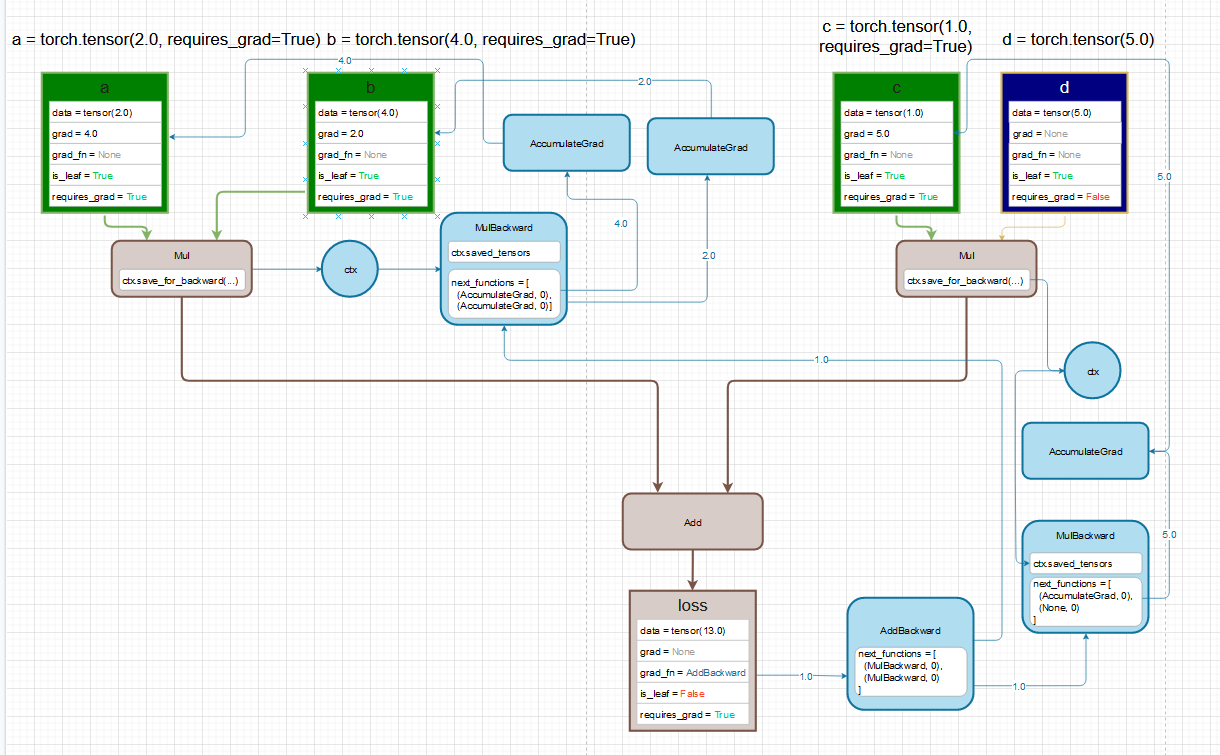

In [21]:
a = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([4.0], requires_grad=True)
c = torch.tensor([1.0], requires_grad=True)
d = torch.tensor([5.0], requires_grad=False)

In [22]:
print(a.grad)

None


In [24]:
loss = a*b + c*d
loss.backward()

In [25]:
print(a.grad)

tensor([4.])


## Задание 3
Поэксперементируйте с размером тензоров, которые влезут на видеоркарту в Colab. Найдите максимальный размер тензора для типа данных float32, float64, float16, int32, int64. На сколько они отличаются.

In [15]:
import torch

In [16]:
a=torch.zeros(4096, 927872,dtype=torch.int32,device='cuda')

In [17]:
torch.cuda.memory_reserved(), torch.cuda.memory_allocated()

(15202254848, 15202254848)

In [18]:
!nvidia-smi

Sun Dec  4 20:37:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    28W /  70W |  15106MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Максимальные значение:

- float16, float32, float64: [4986, [1855744, 927872, 463936]]
- int16, int32, int64: [4986, [1855744, 927872, 463936]]



## Задание 4

 Напишите хороший пример неэффективного кода для занятия памяти видеокарты, который вызовет ошибку out of memory

In [2]:
import torch
def allocate_empty_tensor(dim_size):
  a=torch.zeros(4096,dim_size,dtype=torch.float32,device='cuda')

In [3]:
allocate_empty_tensor(1000000000000)

RuntimeError: ignored

## Задание 5

Домашнее задание 5: Используя один линейный слой nn.Linear и один входной тензор x подберите подберите размерности так, чтобы занимать всю видеопамять. Попробуйте применить линейный слой к тензору x. Что произойдет? Кратко опишите ваши эксперименты. Что вы поняли?





In [1]:
import torch
lr = torch.nn.Linear(4096 * 4096, 224, device='cuda')
x = torch.zeros(4096 * 4096, dtype=torch.float32, device='cuda')
lr(x)

RuntimeError: ignored

Поскольку память переполнена при инициализации срабатывает ошибка, так как не хватает памяти.